✅ Dataset Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

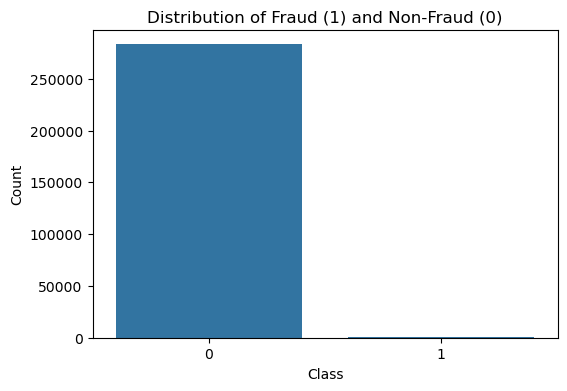

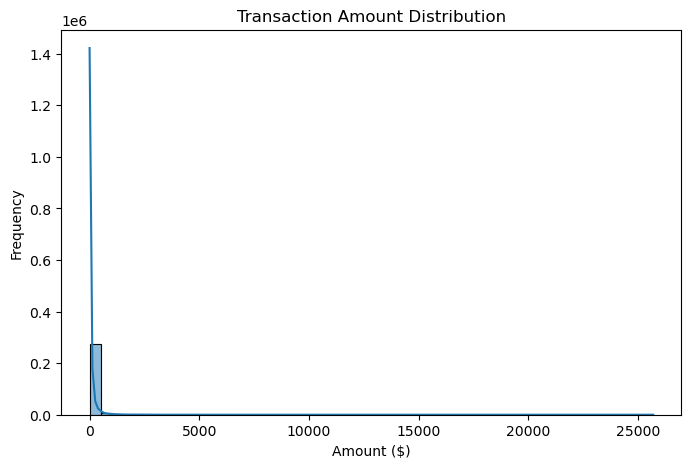


🔄 Training the Random Forest Model...
✅ Model Training Completed!

📊 Model Accuracy: 99.78%

🔍 Confusion Matrix:
[[56616    35]
 [   88     7]]


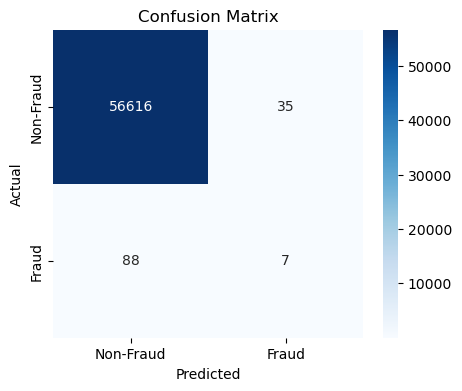


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.17      0.07      0.10        95

    accuracy                           1.00     56746
   macro avg       0.58      0.54      0.55     56746
weighted avg       1.00      1.00      1.00     56746


✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
file_path = "creditcard.csv"
df = pd.read_csv(file_path)

# Display basic info
print("✅ Dataset Loaded Successfully!\n")
print(df.info())
print(df.head())

# -------------------------------
# 🔹 Data Cleaning
# -------------------------------
# Checking for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Checking duplicate entries
print("\n🔍 Checking for duplicate entries:")
print(f"Total Duplicates: {df.duplicated().sum()}")

# Drop duplicates if necessary
df = df.drop_duplicates()

# -------------------------------
# 🔹 Data Preprocessing
# -------------------------------
# Selecting Features & Target
features = ['Amount', 'Time']  # Adjust based on dataset
target = 'Class'

X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\n✅ Data Preprocessing Completed!")

# -------------------------------
# 🔹 Exploratory Data Analysis (EDA)
# -------------------------------

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'])
plt.title("Distribution of Fraud (1) and Non-Fraud (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualizing amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 🔹 Model Training
# -------------------------------
print("\n🔄 Training the Random Forest Model...")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model Training Completed!")

# -------------------------------
# 🔹 Model Evaluation
# -------------------------------

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 🔹 Saving the Model
# -------------------------------

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save the scaler for preprocessing in Flask
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("\n✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!")


✅ Dataset Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

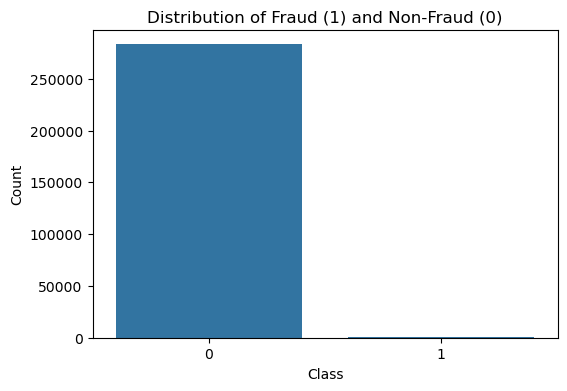

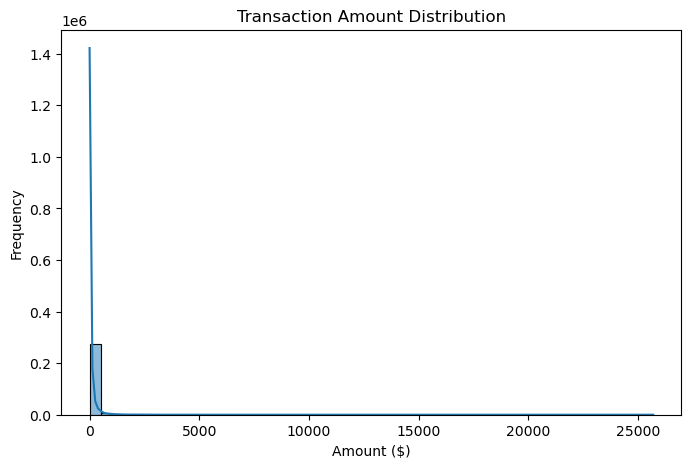


🔄 Training the Random Forest Model...
✅ Model Training Completed!

📊 Model Accuracy: 99.78%

🔍 Confusion Matrix:
[[56616    35]
 [   88     7]]


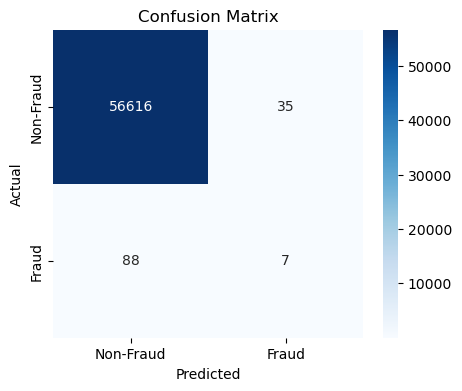


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.17      0.07      0.10        95

    accuracy                           1.00     56746
   macro avg       0.58      0.54      0.55     56746
weighted avg       1.00      1.00      1.00     56746


✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
file_path = "creditcard.csv"
df = pd.read_csv(file_path)

# Display basic info
print("✅ Dataset Loaded Successfully!\n")
print(df.info())
print(df.head())

# -------------------------------
# 🔹 Data Cleaning
# -------------------------------
# Checking for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Checking duplicate entries
print("\n🔍 Checking for duplicate entries:")
print(f"Total Duplicates: {df.duplicated().sum()}")

# Drop duplicates if necessary
df = df.drop_duplicates()

# -------------------------------
# 🔹 Data Preprocessing
# -------------------------------
# Selecting Features & Target
features = ['Amount', 'Time']  # Adjust based on dataset
target = 'Class'

X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\n✅ Data Preprocessing Completed!")

# -------------------------------
# 🔹 Exploratory Data Analysis (EDA)
# -------------------------------

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'])
plt.title("Distribution of Fraud (1) and Non-Fraud (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualizing amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 🔹 Model Training
# -------------------------------
print("\n🔄 Training the Random Forest Model...")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model Training Completed!")

# -------------------------------
# 🔹 Model Evaluation
# -------------------------------

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 🔹 Saving the Model
# -------------------------------

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save the scaler for preprocessing in Flask
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("\n✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!")


✅ Dataset Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

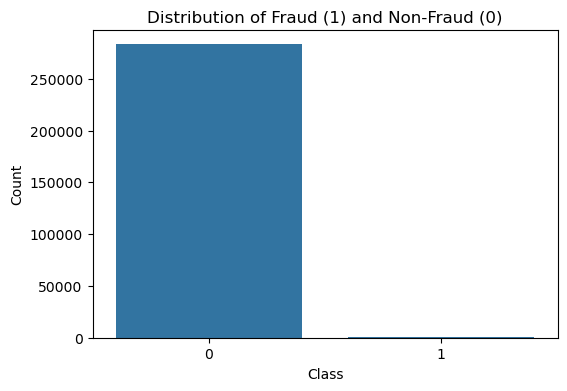

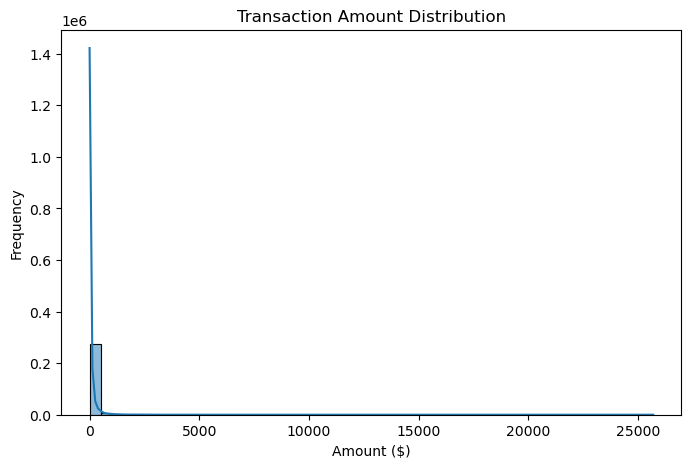


🔄 Training the Random Forest Model...
✅ Model Training Completed!

📊 Model Accuracy: 99.78%

🔍 Confusion Matrix:
[[56616    35]
 [   88     7]]


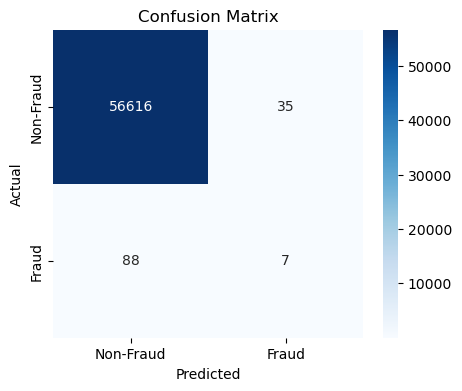


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.17      0.07      0.10        95

    accuracy                           1.00     56746
   macro avg       0.58      0.54      0.55     56746
weighted avg       1.00      1.00      1.00     56746


✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
file_path = "creditcard.csv"
df = pd.read_csv(file_path)

# Display basic info
print("✅ Dataset Loaded Successfully!\n")
print(df.info())
print(df.head())

# -------------------------------
# 🔹 Data Cleaning
# -------------------------------
# Checking for missing values
print("\n🔍 Checking for missing values:")
print(df.isnull().sum())

# Checking duplicate entries
print("\n🔍 Checking for duplicate entries:")
print(f"Total Duplicates: {df.duplicated().sum()}")

# Drop duplicates if necessary
df = df.drop_duplicates()

# -------------------------------
# 🔹 Data Preprocessing
# -------------------------------
# Selecting Features & Target
features = ['Amount', 'Time']  # Adjust based on dataset
target = 'Class'

X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\n✅ Data Preprocessing Completed!")

# -------------------------------
# 🔹 Exploratory Data Analysis (EDA)
# -------------------------------

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'])
plt.title("Distribution of Fraud (1) and Non-Fraud (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualizing amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 🔹 Model Training
# -------------------------------
print("\n🔄 Training the Random Forest Model...")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model Training Completed!")

# -------------------------------
# 🔹 Model Evaluation
# -------------------------------

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 🔹 Saving the Model
# -------------------------------

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save the scaler for preprocessing in Flask
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("\n✅ Model and Scaler saved successfully as 'model.pkl' & 'scaler.pkl'!")
